In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading dataset
data=pd.read_csv("dataframe_.csv")

# Basic checks

In [3]:
# first five rows
data.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [4]:
# Last five rows
data.tail()

,input,output
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052
1696,17.145296,-101.726894


In [5]:
# shape of dataset
data.shape

(1697, 2)

In [6]:
# columns of dataset
data.columns

Index(['input', 'output'], dtype='object')

In [7]:
# Examine the data
data.describe()

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


In [8]:
data.dtypes

input     float64
output    float64
dtype: object

In [9]:
# check missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


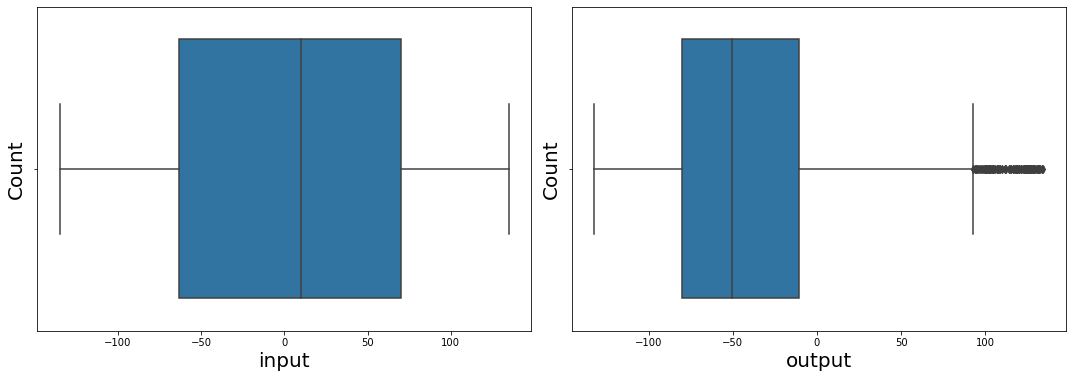

In [10]:
plt.figure(figsize=(15,10),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

* Outliers present in output feature.

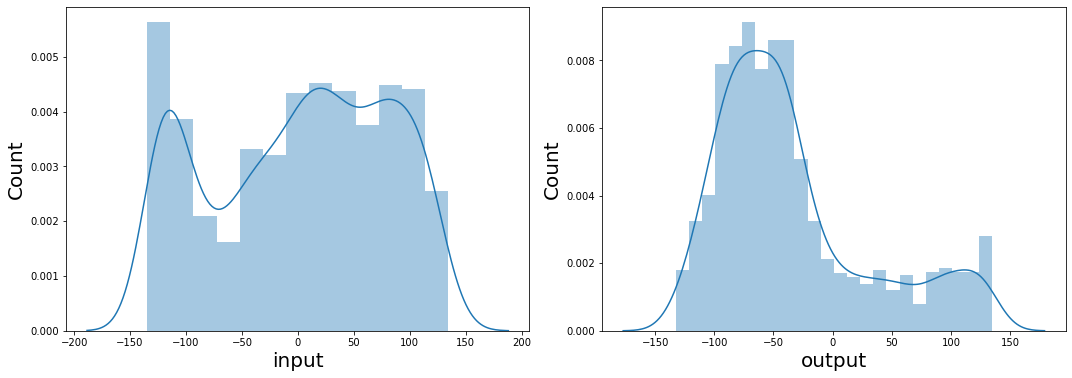

In [11]:
plt.figure(figsize=(15,10),facecolor='white')
plotnumber=1

for column in data:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Count',fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Outliers Handling

In [12]:
upper_limit = data.output.mean() + 3*data.output.std()
upper_limit

163.22531948143688

In [13]:
lower_limit = data.output.mean() -3*data.output.std()
lower_limit

-231.40135386797573

In [14]:
len((data.loc[data['output'] > upper_limit]))

0

In [15]:
len((data.loc[data['output'] < lower_limit]))

0

In [16]:
data.loc[data['output'] > upper_limit,'output']=data['output'].median()

In [17]:
(data.loc[data['output'] > upper_limit])

,input,output


In [18]:
data.loc[data['output'] < lower_limit,'output']=data['output'].median()

In [19]:
(data.loc[data['output'] < lower_limit])

,input,output


<AxesSubplot:xlabel='output'>

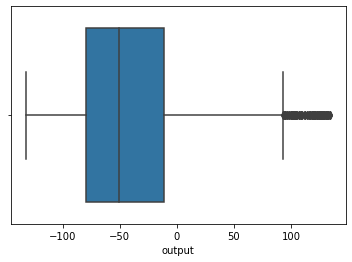

In [20]:
sns.boxplot(x=data.output)

In [21]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(data)

# Feature selection

<AxesSubplot:>

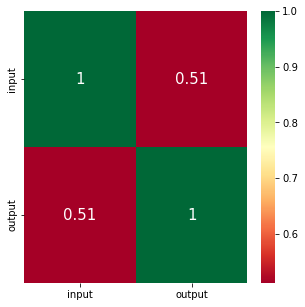

In [22]:
## Checking correlation

plt.figure(figsize=(5,5))
sns.heatmap(data.corr(), annot=True,cmap="RdYlGn", annot_kws={"size":15})

# Model creation

In [23]:
data.isnull().sum()

input     1
output    1
dtype: int64

* missing values present in input & output features.

In [24]:
data['input']=data['input'].fillna(data['input'].median())

In [25]:
data['output']=data['output'].fillna(data['input'].median())

In [26]:
data.isnull().sum()

input     0
output    0
dtype: int64

In [27]:
## Creating independent and dependent variable
X = data.input
Y = data.output

In [28]:
X=np.array(X).reshape(-1,1)

In [29]:
## preparing training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [30]:
X_train

array([[  -5.18512452],
       [-115.5637388 ],
       [  84.6333313 ],
       ...,
       [-120.8121797 ],
       [ 105.0756003 ],
       [-133.8181748 ]])

In [31]:
X_test

array([[ 2.98812668e+01],
       [-5.08998696e+01],
       [-3.40046026e+01],
       [ 1.17633331e+02],
       [ 8.15812922e+01],
       [ 1.10135197e+02],
       [-7.58673491e+00],
       [ 1.14933691e+01],
       [ 1.26257790e+02],
       [-6.86556756e+01],
       [ 1.66333313e+01],
       [ 1.24727894e+02],
       [ 9.48247800e+01],
       [ 2.96714939e+01],
       [-9.32466879e+01],
       [-5.18512452e+00],
       [-1.33130296e+02],
       [-7.83666687e+01],
       [ 9.05767223e+01],
       [ 1.09085309e+02],
       [-2.76921886e+01],
       [-1.22366669e+02],
       [-2.39954204e+01],
       [-8.93666687e+01],
       [ 7.76333313e+01],
       [ 2.98796474e+01],
       [-1.27366669e+02],
       [-2.93916879e+01],
       [ 8.86333313e+01],
       [ 6.71474931e+01],
       [-1.13313112e+02],
       [ 6.36225441e+01],
       [-2.43666687e+01],
       [-1.13278338e+02],
       [ 6.06333313e+01],
       [ 6.22527991e+01],
       [ 6.46442617e+01],
       [-2.98077384e+01],
       [ 1.0

In [32]:
Y_train

208     -70.202439
1117   -126.267621
1417      7.000000
1524     29.150656
58      -55.000000
           ...    
1130    -85.090711
1294    -52.843621
860    -132.422167
1459     90.884730
1126   -127.063611
Name: output, Length: 1272, dtype: float64

In [33]:
Y_test

618     -81.760711
115     -51.665133
135     -57.318721
350     107.000000
1395    -25.074661
           ...    
1617   -111.079269
1635   -114.403385
425      22.862710
1175    -72.978307
1259    -46.170716
Name: output, Length: 425, dtype: float64

# Linear Regression

In [34]:
# Creating model
from sklearn.linear_model import LinearRegression
LR=LinearRegression() # object creation
LR.fit(X_train,Y_train) # training of linear regression
y_predict=LR.predict(X_test)

In [35]:
y_predict  #Values predicted by model

array([-2.10845157e+01, -5.70486438e+01, -4.95267944e+01,  1.79831012e+01,
        1.93257001e+00,  1.46448979e+01, -3.77654399e+01, -2.92708911e+01,
        2.18227493e+01, -6.49536091e+01, -2.69825566e+01,  2.11416327e+01,
        7.82863080e+00, -2.11779075e+01, -7.59016393e+01, -3.66962321e+01,
       -9.36580023e+01, -6.92769873e+01,  5.93737627e+00,  1.41774829e+01,
       -4.67164790e+01, -8.88659867e+01, -4.50706611e+01, -7.41742371e+01,
        1.74919907e-01, -2.10852367e+01, -9.10920094e+01, -4.74731038e+01,
        5.07216977e+00, -4.49342278e+00, -8.48353021e+01, -6.06274607e+00,
       -4.52359425e+01, -8.48198208e+01, -7.39355716e+00, -6.67256276e+00,
       -5.60787278e+00, -4.76583314e+01,  1.05252692e+01, -1.01531441e+01,
       -1.80796846e+01, -8.97563958e+01, -8.15808197e+00, -8.93111913e+01,
       -3.49964906e+01, -2.06195524e+01, -8.04662933e+00, -8.93134976e+01,
       -3.01018697e+01, -7.63746467e+01, -7.77358734e+01, -2.32811851e+01,
       -9.26160604e+01,  

In [36]:
#model evaluation
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
r2score=r2_score(Y_test,y_predict)

In [37]:
r2score

0.16482618414611483

In [38]:
X_test.shape

(425, 1)

In [39]:
## Calculate adjusted r2 score
adjusted_r2=1-(1-0.16)*(425-1)/(425-1-1)
adjusted_r2

0.1580141843971632

In [40]:
import math
print(mean_squared_error(Y_test,y_predict))
print(math.sqrt(mean_squared_error(Y_test,y_predict)))  #root mean squared error

3779.139643482795
61.474707347679136


In [41]:
print(mean_absolute_error(Y_test,y_predict))

45.8333705887265


# Random Forest 

In [42]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100)
rf_reg.fit(X_train,Y_train)

RandomForestRegressor()

In [43]:
y_predictRF=rf_reg.predict(X_test)

In [44]:
y_predictRF

array([ -90.52080742,  -49.8232819 ,  -54.27680587,   94.68667956,
        -25.07182086,   81.83076594,  -67.83008943, -101.9269002 ,
         93.17837251,  -40.33393083,  -97.73131611,  122.94227062,
         34.41068608,  -77.3599774 ,  -43.82619065,  -70.07895904,
        -91.17285312,  -32.44613798,   26.18477477,   85.15523767,
        -69.20789454,  -83.4263907 ,  -70.28127416,  -45.30434571,
          1.69828139,  -90.52080742, -100.3375583 ,  -62.92738815,
         22.09285641,  -36.11344948,  -90.84727157,  -41.10571771,
        -65.46254147,  -85.76919247,  -65.55495297,  -36.50838185,
        -22.17718263,  -48.36951477,   45.64294134,  -57.92875199,
        -49.24829083,  -27.69271812,  -13.93327294,  -95.56480862,
        -84.33986007,  -78.428907  ,  -47.00192833,  -95.56480862,
        -92.20929218,  -40.58233104,  -53.22839784,  -65.19860627,
        -41.69312388,   98.19670658,   60.24231443, -104.68347862,
        -44.53723748,  -80.67433357,  -65.93469248,  -68.41008

In [45]:
# Model Evaluation
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
r2score_RF=r2_score(Y_test,y_predictRF)

In [46]:
r2score_RF

0.6799230474078499

In [47]:
X_test.shape

(425, 1)

In [48]:
## Calculate adjusted r2 score
adjusted_r2_RF=1-(1-0.99)*(4345-14)/(4345-14-1)
adjusted_r2_RF

0.9899976905311778

In [49]:
import math
print(mean_squared_error(Y_test,y_predictRF))
print(math.sqrt(mean_squared_error(Y_test,y_predictRF)))  #root mean squared error

1448.3398276434723
38.05706015502869


In [50]:
print(mean_absolute_error(Y_test,y_predictRF))

19.046374195432897


In [83]:
# Hyperparameter Tunning
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]


random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf_reg1 = RandomForestRegressor(random_state=42)

rf_cv = RandomizedSearchCV(estimator=rf_reg1, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=3, random_state=42, n_jobs=-1)

rf_cv.fit(X_train, Y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 2000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None})


In [87]:
rf_reg2 = RandomForestRegressor(**rf_best_params)
rf_reg2.fit(X_train, Y_train)
y_predict_rf=rf_reg2.predict(X_test)
y_predict_rf

array([-8.89338004e+01, -5.00946822e+01, -5.45291470e+01,  9.74780629e+01,
       -2.30908998e+01,  8.28257956e+01, -6.81573969e+01, -1.02651845e+02,
        9.16714243e+01, -4.02838440e+01, -9.74893855e+01,  1.23074070e+02,
        3.02420443e+01, -7.72016789e+01, -4.40264718e+01, -6.85385677e+01,
       -9.18994003e+01, -3.18550551e+01,  2.56054524e+01,  8.45837367e+01,
       -6.97005463e+01, -8.04203197e+01, -6.96828462e+01, -4.55430983e+01,
        6.58705793e+00, -8.89338004e+01, -9.76308958e+01, -6.20526687e+01,
        2.05982592e+01, -3.71778502e+01, -9.16094719e+01, -4.00464865e+01,
       -6.54524692e+01, -8.63966292e+01, -6.74112512e+01, -3.61904481e+01,
       -2.15717282e+01, -4.86031949e+01,  4.57601268e+01, -5.84278587e+01,
       -5.04718876e+01, -2.12628315e+01, -1.65372333e+01, -9.64703776e+01,
       -8.57837652e+01, -7.87427790e+01, -5.36969061e+01, -9.64703776e+01,
       -9.32417795e+01, -4.06220335e+01, -5.32518255e+01, -6.37976072e+01,
       -3.90517539e+01,  

In [88]:
#Model evaluation after Hyperparameter tuning
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
r2score_rf=r2_score(Y_test,y_predict_rf)
r2score_rf

0.684156782494769

In [89]:
## Calculate adjusted r2 score
adjusted_r2_rf=1-(1-0.68)*(425-1)/(425-1-1)
adjusted_r2_rf

0.679243498817967

In [90]:
import math
print(mean_squared_error(Y_test,y_predict_rf))
print(math.sqrt(mean_squared_error(Y_test,y_predict_rf)))  #root mean squared error

1429.1822872569585
37.804527338097465


In [91]:
print(mean_absolute_error(Y_test,y_predict_rf))

19.027531550312638


# KNN Model

In [92]:
from sklearn.neighbors import KNeighborsRegressor#USING KNN
KNN1=KNeighborsRegressor() ## model object creation
KNN1.fit(X_train,Y_train)  ## fitting the model
y_hat_knn=KNN1.predict(X_test) ## getting the predict from created model

In [54]:
y_hat_knn

array([-8.65378193e+01, -4.89958999e+01, -4.89372241e+01,  9.01162503e+01,
       -1.04009139e+01,  8.69699770e+01, -8.18605600e+01, -9.09343713e+01,
        9.81491355e+01, -3.62079763e+01, -1.00980990e+02,  9.57646986e+01,
        3.50953788e+01, -8.79806643e+01, -4.64100776e+01, -7.63452948e+01,
       -1.10544035e+02, -3.67368749e+01,  3.08434760e+01,  9.58808836e+01,
       -6.62025386e+01, -5.54677821e+01, -6.65269615e+01, -4.36953225e+01,
        3.87458484e-01, -8.65378193e+01, -5.83372721e+01, -5.55901502e+01,
        3.21229877e+00, -1.26917677e+01, -8.20159019e+01, -3.55282028e+01,
       -6.53269615e+01, -8.20159019e+01, -3.83699603e+01, -3.75667670e+01,
       -2.92370256e+01, -5.18066490e+01,  4.64532811e+01, -4.67462474e+01,
       -5.64192959e+01, -5.57610752e-01, -3.41431664e+01, -9.17193875e+01,
       -9.27240304e+01, -7.94654337e+01, -4.27295534e+01, -9.17193875e+01,
       -9.55466650e+01, -4.24438406e+01, -5.36531740e+01, -7.51746226e+01,
       -5.83191932e+01,  

In [55]:
# Model evaluation for KNN
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
r2score_KNN=r2_score(Y_test,y_hat_knn)
r2score_KNN

0.6378867971766229

In [56]:
X_test.shape

(425, 1)

In [57]:
## Calculate adjusted r2 score
adjusted_r2_KNN=1-(1-0.63)*(425-1)/(425-1-1)
adjusted_r2_KNN

0.6291252955082742

In [58]:
import math
print(mean_squared_error(Y_test,y_predictRF))
print(math.sqrt(mean_squared_error(Y_test,y_hat_knn)))  #root mean squared error

1448.3398276434723
40.479040984288076


In [59]:
print(mean_absolute_error(Y_test,y_hat_knn))

22.36712643655247


# Decision Tree

In [60]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train,Y_train)
y_hat_DT=dt.predict(X_test)

In [61]:
y_hat_DT

array([ -95.87848863,  -51.66513308,  -57.31872135,  107.        ,
        -25.0746607 ,   80.3365181 ,  -64.97087781, -112.8431645 ,
         82.36724538,  -42.54812756,  -97.        ,  129.        ,
          1.21625178,  -73.48791167,  -44.03772921,  -70.20243924,
        -72.42753461,  -35.        ,   18.03833636,   83.93005242,
        -65.22934947,  -87.        ,  -73.51940597,  -44.        ,
         -1.        ,  -95.87848863, -101.        ,  -72.45230268,
         26.        ,  -57.60861351,  -92.94112847,  -36.        ,
        -63.        ,  -99.43907611,  -89.16489504,  -34.40501243,
         -5.49482492,  -48.29808186,   41.36624334,  -59.        ,
        -39.63667139,  -24.        ,    5.15080161,  -95.        ,
        -76.        ,  -75.9911003 ,  -76.93193485,  -95.        ,
        -92.13509303,  -39.63824551,  -49.        ,  -60.14806655,
        -83.82733147,  103.        ,   43.61714619, -109.0310113 ,
        -43.12700344,  -80.74906409,  -73.19863132,  -76.65343

In [62]:
# Evaluation of model
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
r2score_DT=r2_score(Y_test,y_hat_DT)
r2score_DT

0.6549954233451032

In [63]:
X_test.shape

(425, 1)

In [64]:
## Calculate adjusted r2 score
adjusted_r2_DT=1-(1-0.65)*(425-1)/(425-1-1)
adjusted_r2_DT

0.6491725768321513

In [65]:
import math
print(mean_squared_error(Y_test,y_hat_DT))
print(math.sqrt(mean_squared_error(Y_test,y_hat_DT)))  #root mean squared error

1561.1366736713217
39.51122212323129


In [66]:
print(mean_absolute_error(Y_test,y_hat_DT))

15.767925368214902


In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
params = { 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_reg = DecisionTreeRegressor(random_state=3)
tree_cv = GridSearchCV(tree_reg, params, scoring='neg_mean_squared_error', n_jobs=-1, verbose=3, cv=3)
tree_cv.fit(X_train,Y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

Fitting 3 folds for each of 2166 candidates, totalling 6498 fits
Best paramters: {'max_depth': 8, 'min_samples_leaf': 18, 'min_samples_split': 2, 'splitter': 'best'})


In [69]:
print(f"Best paramters: {best_params})")

Best paramters: {'max_depth': 8, 'min_samples_leaf': 18, 'min_samples_split': 2, 'splitter': 'best'})


In [70]:
tree_cv.best_params_

{'max_depth': 8,
 'min_samples_leaf': 18,
 'min_samples_split': 2,
 'splitter': 'best'}

In [71]:
tree_cv.best_score_

-1209.6702552296322

In [72]:
dt1=DecisionTreeRegressor(max_depth= 8,min_samples_leaf= 18,min_samples_split= 2,splitter= 'best')
dt1.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=18)

In [77]:
y_hat_dt=dt1.predict(X_test)
y_hat_dt

array([ -85.18510788,  -44.30277482,  -44.30277482,   96.40844261,
         -7.0436637 ,   74.97569696,  -78.93632365,  -99.37659232,
        108.9234569 ,  -44.30277482,  -91.08996809,  108.9234569 ,
         30.53857173,  -85.18510788,  -44.30277482,  -78.93632365,
        -92.12634822,  -44.30277482,   44.75766329,   74.97569696,
        -61.30044597,  -56.31511823,  -61.30044597,  -44.30277482,
          2.28146324,  -85.18510788, -110.45194925,  -54.35567545,
         15.19841709,  -31.02262142,  -69.16776103,  -37.62301156,
        -61.30044597,  -69.16776103,  -37.62301156,  -37.62301156,
        -20.17645322,  -54.35567545,   62.30998326,  -47.03292149,
        -63.47601418,   18.84370897,  -37.62301156,   18.84370897,
        -87.67267278,  -85.18510788,  -37.62301156,   18.84370897,
        -83.66213085,  -44.30277482,  -44.30277482,  -76.6619564 ,
        -92.12634822,   89.23231362,   89.23231362,  -91.08996809,
        -47.03292149,  -87.67267278,  -60.0602262 ,  -88.20656

In [78]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
r2score_dt=r2_score(Y_test,y_hat_dt)
r2score_dt

0.6643054153279992

In [79]:
X_test.shape

(425, 1)

In [80]:
## Calculate adjusted r2 score
adjusted_r2_dt=1-(1-0.99)*(4345-14)/(4345-14-1)
adjusted_r2_dt

0.9899976905311778

In [81]:
import math
print(mean_squared_error(Y_test,y_hat_dt))
print(math.sqrt(mean_squared_error(Y_test,y_hat_dt)))  #root mean squared error

1519.0092037780068
38.97446861444049


In [82]:
print(mean_absolute_error(Y_test,y_hat_dt))

22.566976549831832


# Support Vector Regressor

In [85]:
from sklearn.svm import SVR
svregressor = SVR() ## base model with default parameters
svregressor.fit(X, Y)

SVR()

In [86]:
y_hat_SVR=svregressor.predict(X_test)

In [93]:
y_hat_SVR

array([-80.9530172 , -40.4155272 , -51.93476254,  65.79768829,
         9.11229042,  58.40429535, -76.62883848, -86.5382025 ,
        70.80021408, -37.90944118, -86.68090292,  70.1881607 ,
        35.36294554, -81.11443383, -50.34115329, -78.52205801,
       -78.50315213, -40.98449747,  27.42002301,  57.150274  ,
       -57.75122179, -72.86629567, -61.33383086, -47.4962278 ,
         0.66704399, -80.95427206, -75.79895421, -56.1379485 ,
        23.6149616 , -21.9848675 , -66.45217442, -29.41735798,
       -60.97102028, -66.4254164 , -35.55515889, -32.25164532,
       -27.28189048, -55.7474708 ,  45.63040758, -47.60760378,
       -74.55800301, -74.09969307, -38.9947339 , -73.49260598,
       -81.2154885 , -80.11551861, -38.49767035, -73.49580108,
       -86.18339904, -51.15483605, -53.56017385, -84.14422352,
       -77.49830512,  63.17398217,  61.20326106, -86.7713555 ,
       -46.23085193, -84.252253  , -60.45625006, -72.02028677,
       -47.71233163, -52.70016409, -52.68102101,  17.41

In [95]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
r2score_SVR=r2_score(Y_test,y_hat_SVR)
r2score_SVR

0.6012480920008079

In [96]:
X_test.shape

(425, 1)

In [97]:
## Calculate adjusted r2 score
adjusted_r2_SVR=1-(1-0.60)*(425-1)/(425-1-1)
adjusted_r2_SVR

0.5990543735224585

In [98]:
import math
print(mean_squared_error(Y_test,y_hat_SVR))
print(math.sqrt(mean_squared_error(Y_test,y_hat_SVR)))  #root mean squared error

1804.3419403581877
42.47754630811657


In [99]:
print(mean_absolute_error(Y_test,y_hat_SVR))

23.136331783089084


## Hyperparameter tuning

In [100]:
regressor=SVR(C=0.1,cache_size=200,coef0=1,degree=3,epsilon=0.1,gamma='auto',kernel='rbf')

In [101]:
regressor.fit(X,Y)

SVR(C=0.1, coef0=1, gamma='auto')

In [102]:
y_reg1=regressor.predict(X_test)
y_reg1

array([-51.82708669, -49.50603593, -50.73543577, -49.49496865,
       -49.72828387, -49.83365647, -51.89650477, -52.26756654,
       -49.93123446, -49.96222582, -52.16281524, -49.8095475 ,
       -49.46118894, -51.72102142, -49.84088205, -52.04540492,
       -51.74445222, -50.27693527, -49.46247347, -49.64386966,
       -51.79990471, -51.49541254, -51.23261666, -50.61620363,
       -49.19365682, -51.82636857, -50.99720038, -50.64951413,
       -49.74394608, -49.9214738 , -52.51241837, -49.74542455,
       -51.18509353, -52.50508538, -50.26112075, -50.26344067,
       -49.83115031, -50.44876682, -49.40231399, -50.05057568,
       -51.3076537 , -50.97753791, -49.98754711, -51.2700473 ,
       -51.96586576, -51.92335185, -50.08062053, -51.26832232,
       -51.97531543, -50.05607352, -50.57486416, -52.10236069,
       -52.42832798, -49.23459174, -47.78442916, -52.1534553 ,
       -49.99145607, -52.41587816, -51.02629181, -51.9291847 ,
       -50.0692406 , -50.16011112, -50.16431547, -49.07

## Model evaluation after hyperparameter tuning

In [103]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
r2score_svr=r2_score(Y_test,y_reg1)
r2score_svr

-0.045035302747351125

In [104]:
X_test.shape

(425, 1)

In [105]:
## Calculate adjusted r2 score
adjusted_r2_svr=1-(1+0.04)*(425-1)/(425-1-1)
adjusted_r2_svr

-0.04245862884160756

In [106]:
import math
print(mean_squared_error(Y_test,y_reg1))
print(math.sqrt(mean_squared_error(Y_test,y_reg1)))  #root mean squared error

4728.757375389869
68.76596087738372


In [107]:
print(mean_absolute_error(Y_test,y_reg1))

48.24902081061221


In [111]:
r2_score=[r2score,r2score_RF,r2score_KNN,r2score_DT,r2score_SVR]
col={'R2 Score':r2_score}
models=['Linear Regression','Random Forest Regressor','KNN Regressor','Decision Tree Regressor','Support Vector Regressor']
data=pd.DataFrame(data=col,index= models)
data

,R2 Score
Linear Regression,0.164826
Random Forest Regressor,0.679923
KNN Regressor,0.637887
Decision Tree Regressor,0.654995
Support Vector Regressor,0.601248


* Conclusion:
* In all algorithms Random Forest Regressor is working good.
* After Random Forest Regressor Decision Tree Regressor is working good.